# **Config**

In [1]:
!pip install xgboost
!pip install scikit-learn

# **EXPLORASI DATA**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = 'kidney_disease.csv'
dataset = pd.read_csv(file_path)

# Eksplorasi dasar
print("Dimensi Dataset:", dataset.shape)
print("\nInformasi Dataset:\n")
print(dataset.info())
print("\nLima Baris Pertama Dataset:\n")
print(dataset.head())

Dimensi Dataset: (400, 26)

Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    

# **MENAMPILKAN MISSING VALUE**



In [3]:
# Menampilkan missing value
print("\nJumlah Missing Value per Kolom:\n")
print(dataset.isnull().sum())


Jumlah Missing Value per Kolom:

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


# **PRE PROCESSING**

In [4]:
# Display unique values before replacement
print("Unique values before replacement:", dataset['classification'].unique())

Unique values before replacement: ['ckd' 'ckd\t' 'notckd']


In [5]:
# Replace 'ckd\t' with 'ckd'
dataset['classification'] = dataset['classification'].replace('ckd\t', 'ckd')

# Check if there are still anomalies
print("Unique values after replacement:", dataset['classification'].unique())

Unique values after replacement: ['ckd' 'notckd']


In [6]:
# Mengatasi missing value (contoh: dengan modus untuk kategorikal dan median untuk numerikal)
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    else:
        dataset[column] = dataset[column].fillna(dataset[column].median())

# Konversi tipe data
# Kolom-kolom kategorikal yang perlu diubah ke numeri
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

for col in dataset.columns:
    try:
        dataset[col] = dataset[col].astype(float)
    except ValueError:

        dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

        dataset[col] = dataset[col].fillna(dataset[col].median())

        dataset[col] = dataset[col].astype(float)

# Menghapus kolom "id" karena tidak diperlukan
dataset = dataset.drop('id', axis=1)

print("\nDataset setelah penanganan missing value dan label encoding:\n")
print(dataset.head())
print(dataset.info())


Dataset setelah penanganan missing value dan label encoding:

    age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv      wc  \
0  48.0  80.0  1.020  1.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  44.0  7800.0   
1   7.0  50.0  1.020  4.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  38.0  6000.0   
2  62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  423.0  ...  31.0  7500.0   
3  48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.0  ...  32.0  6700.0   
4  51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  106.0  ...  35.0  7300.0   

    rc  htn   dm  cad  appet   pe  ane  classification  
0  5.2  1.0  4.0  1.0    0.0  0.0  0.0             0.0  
1  5.2  0.0  3.0  1.0    0.0  0.0  0.0             0.0  
2  5.2  0.0  4.0  1.0    1.0  0.0  1.0             0.0  
3  3.9  1.0  3.0  1.0    1.0  1.0  1.0             0.0  
4  4.6  0.0  3.0  1.0    0.0  0.0  0.0             0.0  

[5 rows x 25 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total

In [7]:
# Menampilkan missing value
print("\nJumlah Missing Value per Kolom:\n")
print(dataset.isnull().sum())


Jumlah Missing Value per Kolom:

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


# **MENYIMPAN DATASET SETELAH PRE PROCESSING**

In [9]:

# Save the preprocessed dataset to a CSV file
dataset.to_csv('preprocessed_kidney_disease.csv', index=False)

# Download the preprocessed dataset
files.download('preprocessed_kidney_disease.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **SPLITING DAN TRAINING MODEL**

In [8]:
# Drop the target column to create X and y
X = dataset.drop(columns=['classification'])
y = dataset['classification']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Ukuran Data Training (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran Data Testing (X_test, y_test):", X_test.shape, y_test.shape)

Ukuran Data Training (X_train, y_train): (320, 24) (320,)
Ukuran Data Testing (X_test, y_test): (80, 24) (80,)


In [10]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluasi menggunakan Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy (Cross-Validation):", cv_scores.mean())

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not CKD', 'CKD']))

Cross-Validation Scores: [0.9875 1.     0.9875 0.9875 1.    ]
Mean Accuracy (Cross-Validation): 0.9925

Akurasi Model: 0.975

Confusion Matrix:
 [[50  0]
 [ 2 28]]

Classification Report:
               precision    recall  f1-score   support

     Not CKD       0.96      1.00      0.98        50
         CKD       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [11]:
# Evaluasi dengan metrik akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)

# Evaluasi dengan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Evaluasi dengan precision, recall, dan F1-score
class_report = classification_report(y_test, y_pred, target_names=['Tidak GERD', 'GERD'])
print("\nClassification Report:\n", class_report)


Akurasi Model: 0.975

Confusion Matrix:
 [[50  0]
 [ 2 28]]

Classification Report:
               precision    recall  f1-score   support

  Tidak GERD       0.96      1.00      0.98        50
        GERD       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



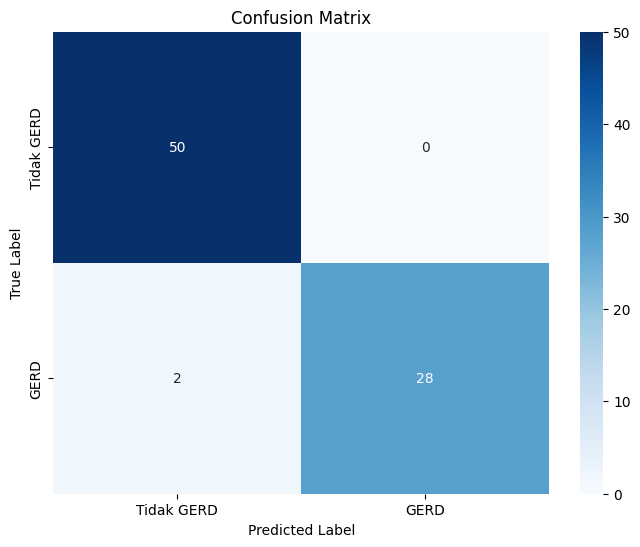

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak GERD', 'GERD'], yticklabels=['Tidak GERD', 'GERD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
